In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#######
from numpy import isnan
#from pandas import read_csv
from datetime import date
%matplotlib inline 

In [50]:
DF1 = pd.read_excel("C:/Users/debaf/Downloads/LFB Mobilisation data 2021 - 2024.xlsx", index_col='IncidentNumber')
# Display the first few rows
DF1.head(10)

,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
000004-01012021,2021,0,5769249,A321,1,2021-01-01 00:06:47,2021-01-01 00:07:35,2021-01-01 00:09:48,48.0,133.0,...,2021-01-01 00:57:30,NaN,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
000005-01012021,2021,0,5769250,F351,1,2021-01-01 00:07:47,2021-01-01 00:09:41,2021-01-01 00:11:57,114.0,136.0,...,2021-01-01 00:18:39,NaN,F35,Woodford,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
000006-01012021,2021,0,5769251,F412,1,2021-01-01 00:08:21,2021-01-01 00:10:32,2021-01-01 00:14:37,131.0,245.0,...,2021-01-01 00:24:43,NaN,F41,Dagenham,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
000007-01012021,2021,0,5769252,H331,1,2021-01-01 00:12:23,2021-01-01 00:13:16,2021-01-01 00:19:12,53.0,356.0,...,2021-01-01 00:40:49,NaN,H33,Wandsworth,Home Station,1,Initial,Initial Mobilisation,8.0,Traffic calming measures
000007-01012021,2021,0,5769253,G351,2,2021-01-01 00:12:23,2021-01-01 00:13:32,2021-01-01 00:19:48,69.0,376.0,...,2021-01-01 00:29:54,NaN,G35,Fulham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
000007-01012021,2021,0,5769255,H341,Not Used,2021-01-01 00:12:23,2021-01-01 00:13:55,2021-01-01 00:20:08,92.0,373.0,...,2021-01-01 00:29:47,NaN,H34,Wimbledon,Home Station,3,Initial,Initial Mobilisation,NaN,NaN
000007-01012021,2021,0,5769254,H271,Not Used,2021-01-01 00:12:23,2021-01-01 00:14:39,2021-01-01 00:20:24,136.0,345.0,...,2021-01-01 00:33:00,NaN,H27,Battersea,Home Station,4,Initial,Initial Mobilisation,NaN,NaN
000007-01012021,2021,0,5769256,H351,Not Used,2021-01-01 00:12:23,2021-01-01 00:13:55,2021-01-01 00:21:27,92.0,452.0,...,2021-01-01 00:27:15,NaN,H35,Tooting,Home Station,5,Initial,Initial Mobilisation,NaN,NaN
000009-01012021,2021,0,5769259,F211,1,2021-01-01 00:14:51,2021-01-01 00:16:37,2021-01-01 00:20:53,106.0,256.0,...,2021-01-01 01:03:24,NaN,F21,Stratford,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up


In [25]:
#Préparation de l'ajout de la colonne jour de la semaine
ColNames=DF1.columns.values.tolist()
ColNames=ColNames+['WeekDayMobilised']
ColNames

['CalYear',
 'HourOfCall',
 'ResourceMobilisationId',
 'Resource_Code',
 'PerformanceReporting',
 'DateAndTimeMobilised',
 'DateAndTimeMobile',
 'DateAndTimeArrived',
 'TurnoutTimeSeconds',
 'TravelTimeSeconds',
 'AttendanceTimeSeconds',
 'DateAndTimeLeft',
 'DateAndTimeReturned',
 'DeployedFromStation_Code',
 'DeployedFromStation_Name',
 'DeployedFromLocation',
 'PumpOrder',
 'PlusCode_Code',
 'PlusCode_Description',
 'DelayCodeId',
 'DelayCode_Description',
 'WeekDayMobilised']

In [52]:
#Obtention du jour de la semaine des interventions
DFweekdays=pd.DataFrame([i.weekday() for i in DF1['DateAndTimeMobilised']], index=DF1.index,columns=['WeekDayMobilised'])
DFweekdays.head()

,WeekDayMobilised
IncidentNumber,
000004-01012021,4
000005-01012021,4
000006-01012021,4
000007-01012021,4
000007-01012021,4


In [37]:
DFweekdays.index


Index(['000004-01012021', '000005-01012021', '000006-01012021',
       '000007-01012021', '000007-01012021', '000007-01012021',
       '000007-01012021', '000007-01012021', '000009-01012021',
       '000010-01012021',
       ...
       '125489-31072024', '125489-31072024', '125489-31072024',
       '125488-31072024', '125491-31072024', '125491-31072024',
       '125492-31072024', '125496-31072024', '125499-31072024',
       '125323-30072024'],
      dtype='object', name='IncidentNumber', length=638519)

In [66]:
#Ajout de la colonne dans le DataFrame. Lundi = 0, dimanche = 6.
#DF2 = pd.concat([DF1,DFweekdays],axis=1,keys=ColNames)
DF2 = pd.concat([DF1,DFweekdays],axis=1)
DF2.head(20)


,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,...,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,WeekDayMobilised
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
000004-01012021,2021,0,5769249,A321,1,2021-01-01 00:06:47,2021-01-01 00:07:35,2021-01-01 00:09:48,48.0,133.0,...,NaN,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,4
000005-01012021,2021,0,5769250,F351,1,2021-01-01 00:07:47,2021-01-01 00:09:41,2021-01-01 00:11:57,114.0,136.0,...,NaN,F35,Woodford,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,4
000006-01012021,2021,0,5769251,F412,1,2021-01-01 00:08:21,2021-01-01 00:10:32,2021-01-01 00:14:37,131.0,245.0,...,NaN,F41,Dagenham,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,4
000007-01012021,2021,0,5769252,H331,1,2021-01-01 00:12:23,2021-01-01 00:13:16,2021-01-01 00:19:12,53.0,356.0,...,NaN,H33,Wandsworth,Home Station,1,Initial,Initial Mobilisation,8.0,Traffic calming measures,4
000007-01012021,2021,0,5769253,G351,2,2021-01-01 00:12:23,2021-01-01 00:13:32,2021-01-01 00:19:48,69.0,376.0,...,NaN,G35,Fulham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,4
000007-01012021,2021,0,5769255,H341,Not Used,2021-01-01 00:12:23,2021-01-01 00:13:55,2021-01-01 00:20:08,92.0,373.0,...,NaN,H34,Wimbledon,Home Station,3,Initial,Initial Mobilisation,NaN,NaN,4
000007-01012021,2021,0,5769254,H271,Not Used,2021-01-01 00:12:23,2021-01-01 00:14:39,2021-01-01 00:20:24,136.0,345.0,...,NaN,H27,Battersea,Home Station,4,Initial,Initial Mobilisation,NaN,NaN,4
000007-01012021,2021,0,5769256,H351,Not Used,2021-01-01 00:12:23,2021-01-01 00:13:55,2021-01-01 00:21:27,92.0,452.0,...,NaN,H35,Tooting,Home Station,5,Initial,Initial Mobilisation,NaN,NaN,4
000009-01012021,2021,0,5769259,F211,1,2021-01-01 00:14:51,2021-01-01 00:16:37,2021-01-01 00:20:53,106.0,256.0,...,NaN,F21,Stratford,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,4


In [56]:
# Display basic information about the dataset
print(DF2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 638519 entries, 000004-01012021 to 125323-30072024
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CalYear                   638519 non-null  int64         
 1   HourOfCall                638519 non-null  int64         
 2   ResourceMobilisationId    638519 non-null  int64         
 3   Resource_Code             638519 non-null  object        
 4   PerformanceReporting      638519 non-null  object        
 5   DateAndTimeMobilised      638519 non-null  datetime64[ns]
 6   DateAndTimeMobile         635724 non-null  datetime64[ns]
 7   DateAndTimeArrived        638519 non-null  datetime64[ns]
 8   TurnoutTimeSeconds        635706 non-null  float64       
 9   TravelTimeSeconds         635704 non-null  float64       
 10  AttendanceTimeSeconds     638519 non-null  int64         
 11  DateAndTimeLeft           638279 non-null  date

In [57]:
# Check for missing values
print(DF2.isnull().sum())

#DateAndTimeReturned, DelayCodeId et DelayCode_Description sont trop vides pour être utilisables, on va supprimer les colonnes.
#Elles ne sont pas vitales pour notre stade de développement d'application. Une version ultérieure du modèle pourra prendre en compte la limite du nombre de véhicules diponibles et les raisons des retard rencontrés sur le chemin. 

CalYear                          0
HourOfCall                       0
ResourceMobilisationId           0
Resource_Code                    0
PerformanceReporting             0
DateAndTimeMobilised             0
DateAndTimeMobile             2795
DateAndTimeArrived               0
TurnoutTimeSeconds            2813
TravelTimeSeconds             2815
AttendanceTimeSeconds            0
DateAndTimeLeft                240
DateAndTimeReturned         638519
DeployedFromStation_Code         4
DeployedFromStation_Name         4
DeployedFromLocation           454
PumpOrder                        0
PlusCode_Code                    0
PlusCode_Description             0
DelayCodeId                 479608
DelayCode_Description       479608
WeekDayMobilised                 0
dtype: int64


In [67]:
DF2=DF2.drop(['DateAndTimeReturned', 'DelayCodeId' , 'DelayCode_Description'], axis=1)
print(DF2.isnull().sum())

#Supprimer les lignes avec NaN ou ne pas utiliser ces colonnes pour entrainement ?

CalYear                        0
HourOfCall                     0
ResourceMobilisationId         0
Resource_Code                  0
PerformanceReporting           0
DateAndTimeMobilised           0
DateAndTimeMobile           2795
DateAndTimeArrived             0
TurnoutTimeSeconds          2813
TravelTimeSeconds           2815
AttendanceTimeSeconds          0
DateAndTimeLeft              240
DeployedFromStation_Code       4
DeployedFromStation_Name       4
DeployedFromLocation         454
PumpOrder                      0
PlusCode_Code                  0
PlusCode_Description           0
WeekDayMobilised               0
dtype: int64


In [59]:
# Summary statistics numerical columns
print(DF2.describe())

             CalYear     HourOfCall  ResourceMobilisationId  \
count  638519.000000  638519.000000            6.385190e+05   
mean     2022.396325      13.342759            6.242029e+06   
std         1.044617       6.413062            2.764131e+05   
min      2021.000000       0.000000            5.769249e+06   
25%      2022.000000       9.000000            6.001352e+06   
50%      2022.000000      14.000000            6.243425e+06   
75%      2023.000000      19.000000            6.481036e+06   
max      2024.000000      23.000000            6.725217e+06   

       TurnoutTimeSeconds  TravelTimeSeconds  AttendanceTimeSeconds  \
count       635706.000000      635704.000000          638519.000000   
mean            73.869437         283.772573             356.552698   
std             40.582910         149.701547             152.419778   
min              0.000000           0.000000               0.000000   
25%             51.000000         183.000000             256.000000   
50%   

In [60]:
# Summary statistics for categorical columns
print(DF2.describe(include=['object']))

#PlusCode_Code et PlusCode_Description ne contiennent qu'une seule valeur toujours identique : colonnes à supprimer

       Resource_Code  PerformanceReporting DeployedFromStation_Code  \
count         638519                638519                   638515   
unique           142                     3                      110   
top             A231                     1                      A24   
freq           11572                415130                    20725   

       DeployedFromStation_Name DeployedFromLocation PlusCode_Code  \
count                    638515               638065        638519   
unique                      110                    2             1   
top                        Soho         Home Station       Initial   
freq                      20725               613752        638519   

        PlusCode_Description  
count                 638519  
unique                     1  
top     Initial Mobilisation  
freq                  638519  


In [68]:
DF2=DF2.drop(['PlusCode_Code','PlusCode_Description'], axis=1)
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638519 entries, 000004-01012021 to 125323-30072024
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CalYear                   638519 non-null  int64         
 1   HourOfCall                638519 non-null  int64         
 2   ResourceMobilisationId    638519 non-null  int64         
 3   Resource_Code             638519 non-null  object        
 4   PerformanceReporting      638519 non-null  object        
 5   DateAndTimeMobilised      638519 non-null  datetime64[ns]
 6   DateAndTimeMobile         635724 non-null  datetime64[ns]
 7   DateAndTimeArrived        638519 non-null  datetime64[ns]
 8   TurnoutTimeSeconds        635706 non-null  float64       
 9   TravelTimeSeconds         635704 non-null  float64       
 10  AttendanceTimeSeconds     638519 non-null  int64         
 11  DateAndTimeLeft           638279 non-null  date

In [69]:
# test drop rows where NaN
df_cleaned = DF2.dropna() 
df_cleaned.info()

#ok, différence négligeable avec le nombre de lignes antérieur, les "null" étaient bien sur les même lignes.

<class 'pandas.core.frame.DataFrame'>
Index: 635064 entries, 000004-01012021 to 125323-30072024
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CalYear                   635064 non-null  int64         
 1   HourOfCall                635064 non-null  int64         
 2   ResourceMobilisationId    635064 non-null  int64         
 3   Resource_Code             635064 non-null  object        
 4   PerformanceReporting      635064 non-null  object        
 5   DateAndTimeMobilised      635064 non-null  datetime64[ns]
 6   DateAndTimeMobile         635064 non-null  datetime64[ns]
 7   DateAndTimeArrived        635064 non-null  datetime64[ns]
 8   TurnoutTimeSeconds        635064 non-null  float64       
 9   TravelTimeSeconds         635064 non-null  float64       
 10  AttendanceTimeSeconds     635064 non-null  int64         
 11  DateAndTimeLeft           635064 non-null  date

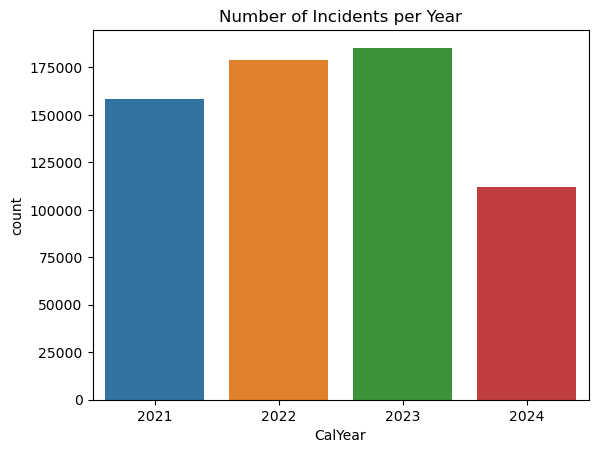

In [70]:
# Plot the distribution of incidents over the years
sns.countplot(x='CalYear', data=df_cleaned)
plt.title('Number of Incidents per Year')
plt.show()

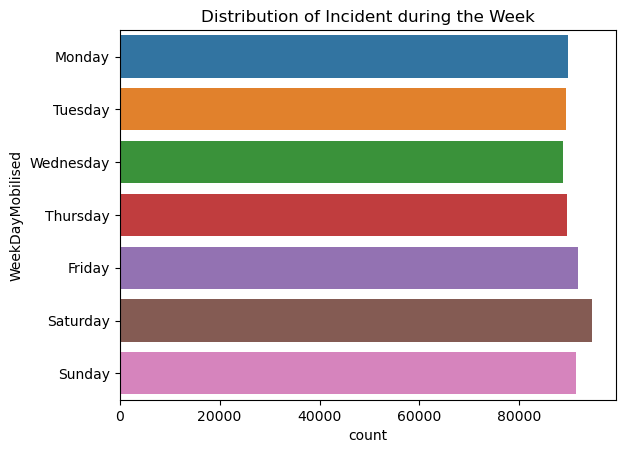

In [72]:
# Distribution of weekdays
ax=sns.countplot(y='WeekDayMobilised', data=df_cleaned)
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title('Distribution of Incident during the Week')
plt.show()

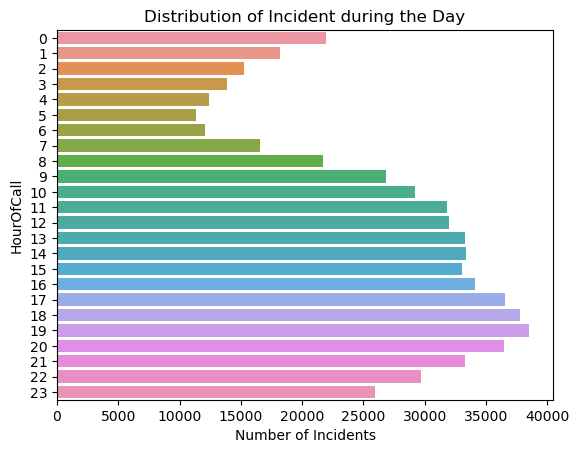

In [76]:
# Distribution of hours of call
sns.countplot(y='HourOfCall', data=df_cleaned)
plt.title('Distribution of Incident during the Day')
plt.xlabel('Number of Incidents')
plt.show()

C:\Users\debaf\AppData\Local\Temp\ipykernel_6684\4207615979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


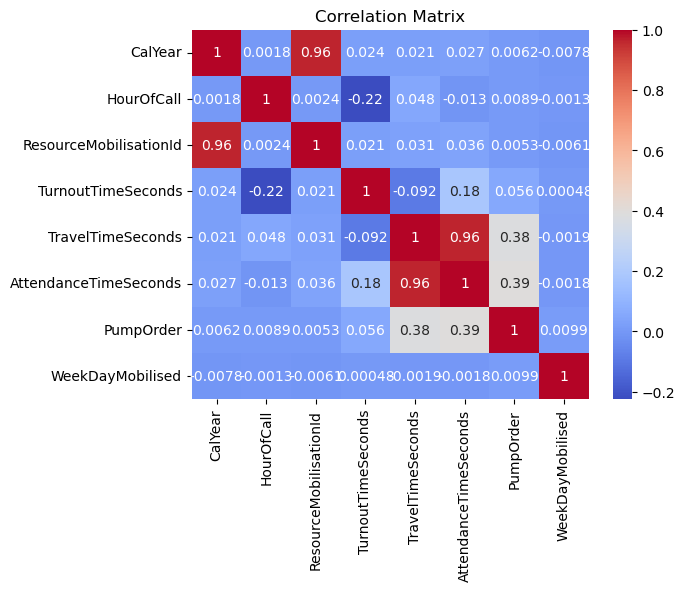

In [74]:
# Correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualization of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#La colonne RessourceMobilisationId est visiblement dépendante de l'année : à supprimer
#AttendanceTimeSeconds et TravelTimeSeconds sont apparemment très corrélées : supprimer AttendanceTimeSeconds de l'entraînement.
#Intéressant : TurnoutTimeSeconds et HourOfCall sont inversement corrélés jusqu'à un certain point : l'heure de l'incident a donc un impact très fort sur le temps d'attente des secours ! 
#Vérifier l'intuition d'une distinction Jour / Nuit ou Heures d'embouteillages / Reste du temps !